1 | INTRODUCTION

In [52]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as st

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Loading the Train Dataset
Dataset = pd.read_csv(r'C:\Users\arpan\Downloads\Internship\Prodigy Infotech\PRODIGY_DS_02\Titanic Dataset\train.csv')

In [54]:
# Printing the Train Dataset & Shape
Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
Dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
Dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2 | Analysis of Dataset/ Data Overview

In [57]:
# Analysis shape of Data
Dataset.shape

(891, 12)

In [58]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
Dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [61]:
# Checking the survival rate in survibal column(value from 2 decimal places)
round(Dataset['Survived'].mean()*100,2)

38.38

In [62]:
# Checking for Null values in Train Dataset and count them
Dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# columns which have nulls and the percentage of nulls in each column

data_na = (Dataset.isnull().sum() / len(Dataset)) *100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Percentage of nulls' :data_na , 'Number of nulls' : Dataset[data_na.index].isna().sum()})
missing_data

,Percentage of nulls,Number of nulls
Cabin,77.104377,687
Age,19.865320,177
Embarked,0.224467,2


In [64]:
Dataset[['Ticket']].duplicated().sum()/len(Dataset)*100

23.56902356902357

| Observations

--> The data-set has 891 rows and 11 features + survived column (target feature).

--> Categorical columns: Survived, Sex, and Embarked. Ordinal columns: Pclass.

--> Continous columns: Age, Fare. Discrete columns: SibSp, Parch.

--> Alphanumeric columns: Ticket and Cabin.

--> Around 38.38% of the data-set survived the Titanic.

--> The passenger ages range from 0.4 to 80.

--> Sex column has two values with 65% male (freq=577/count=891).

--> Embarked column has three values. Port S used by 72.4% of passengers.

--> Ticket column contains high ratio of duplicates (23.5%). we might want to drop it.

--> There are three columns in our data have missing values:

>>>>>Cabin column have almost 77% null values of its data. we might want to drop it.

>>>>>177 value in Age column are missed, Around 19% of its data.

>>>>>Just two values in Embarked are missing, which can easily be filled.


--> SibSp and Parch these features have zero correlation for certain values. We might derive a feature or a set of features from these individual features.

3 | Data Cleaning

1- Drop unuseful columns

Drop PassengerId column from the data set, because it won't benefit in analysis.

Drop Cabin column, becouse 77% of its data are missing. And a general rule is that, if more than half of the data in a column is missing, it's better to drop it.

Drop Ticket column, becouse there may not be a correlation between Ticket and survival and its high ratio of duplicates.

In [65]:
#Drop PassengerId column 
Dataset.drop(columns='PassengerId', inplace=True)

#Drop Cabin column.
Dataset.drop(columns='Cabin', inplace=True)

#Drop Ticket column
Dataset.drop(columns='Ticket', inplace=True)

2- Dealing with missing values

--> We will guess Age missing values using random numbers between mean and standard deviation.

--> we will fill missing values of Embarked columns with mode value. As a reminder, we have to deal with just two missing values.

In [66]:
#Imputing null values of Age column
    
mean = Dataset["Age"].mean()
std = Dataset["Age"].std()
nulls = Dataset["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean - std, mean + std, size = nulls)
    
# fill NaN values in Age column with random values generated
Dataset["Age"][Dataset["Age"].isna()] = random_age
Dataset["Age"] = Dataset["Age"].astype(int)
    
#Imputing null values of Embarked column
    
Dataset['Embarked'].fillna(Dataset['Embarked'].mode()[0],inplace=True)    
    

In [67]:
Dataset.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

3| Create new columns

1 |Create Title Column

In [68]:
title_list = Dataset['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1]).unique()
title_list

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' Countess', ' Jonkheer'], dtype=object)

In [69]:
# replacing all titles with mr, mrs, miss, master, and boy 
def replace_titles(x):
    title=x['Title'].strip()
    
    if (x['Age']<13): return 'Boy'
    
    if title in ['Don', 'Rev', 'Col','Capt','Sir','Major','Jonkheer']: return 'Mr'
    
    elif title in ['Countess', 'Mme']: return 'Mrs'
    
    elif title in ['Mlle', 'Ms','Lady','Dona']: return 'Miss'
    
    elif title =='Dr':
        
        if x['Sex']=='male': return 'Mr'
        else: return 'Mrs'
        
    else: return title

#create a new columns containing the title for each name
Dataset['Title'] = Dataset['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1])
    
#apply replacing title function to all titles
Dataset['Title'] = Dataset.apply(replace_titles, axis=1)

In [70]:
print(f'Data has : {Dataset["Title"].unique()}')
print()
print(Dataset["Title"].value_counts())

Data has : ['Mr' 'Mrs' 'Miss' 'Boy' 'Master']

Title
Mr        536
Miss      154
Mrs       128
Boy        69
Master      4
Name: count, dtype: int64


In [71]:
#drop Name column
Dataset.drop(columns='Name', inplace=True)

II | Create FamilyCount column






We can create a FamilyCount feature which combines Parch (number of parents and children) and SibSp (number of siblings and spouses) columns. This will enable us to drop Parch and SibSp from our datasets.

In [72]:
#create FamilyCount column.
Dataset['FamilyCount'] = Dataset['SibSp'] + Dataset['Parch']+1

In [73]:
Dataset['FamilyCount'].value_counts()

FamilyCount
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

III | Create IsAlone column



Create a IsAlone feature which contain two values (0 or 1). 0 when family count is 1 means there is one alone person and 1 when family count is more than 1.

In [74]:
#create IsAlone column.
Dataset.loc[Dataset['FamilyCount'] > 1, 'IsAlone'] = 0
Dataset.loc[Dataset['FamilyCount'] == 1, 'IsAlone'] = 1   
Dataset['IsAlone'] = Dataset['IsAlone'].astype(int)

In [75]:
Dataset['IsAlone'].value_counts()

IsAlone
1    537
0    354
Name: count, dtype: int64

In [76]:
Dataset.groupby(['IsAlone', 'Survived'])['Survived'].count()

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
Name: Survived, dtype: int64

In [77]:
#drop SibSp and Parch column
Dataset.drop(columns='SibSp', inplace=True)
Dataset.drop(columns='Parch', inplace=True)

In [78]:
Dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,0,3,male,22,7.2500,S,Mr,2,0
1,1,1,female,38,71.2833,C,Mrs,2,0
2,1,3,female,26,7.9250,S,Miss,1,1
3,1,1,female,35,53.1000,S,Mrs,2,0
4,0,3,male,35,8.0500,S,Mr,1,1


4 | Exploratory Data Analysis(EDA)


1- Univariate Analysis

In [79]:
# Add labels to the end of each bar in a bar chart.

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-3

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = "{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),textcoords="offset points", ha='center', va=va)

I | Analysis of categorical columns separately

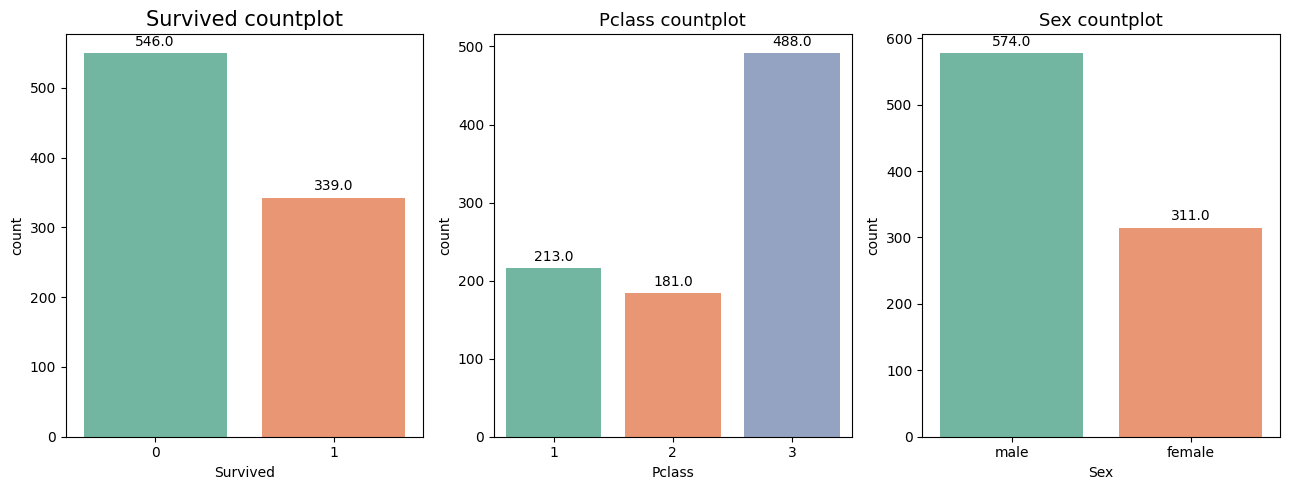

In [80]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Survived countplot', size=15)
plot= sns.countplot(data=Dataset, x='Survived' ,palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Pclass countplot', size=13)
plot= sns.countplot(data=Dataset, x='Pclass', palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Sex countplot', size=13)
plot= sns.countplot(data=Dataset, x='Sex', palette='Set2')
add_value_labels(plot)

plt.tight_layout()

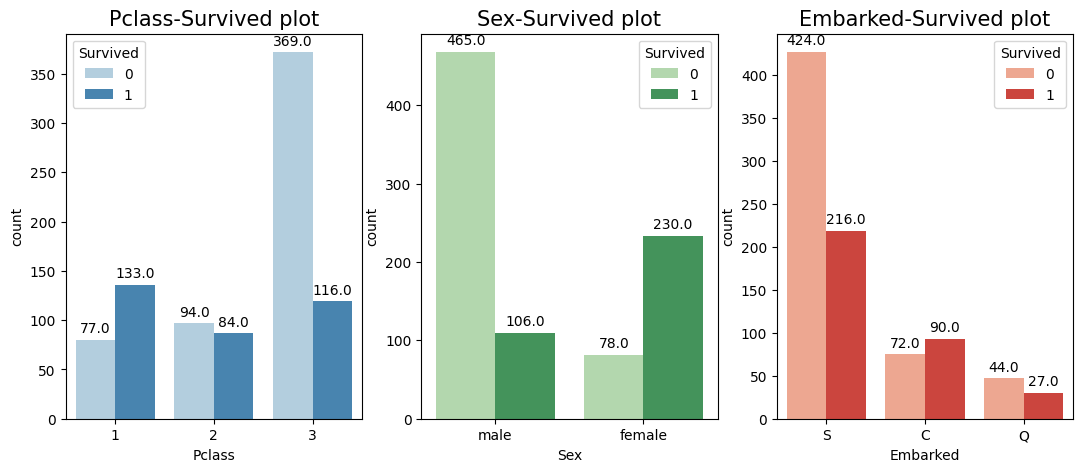

In [81]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Survived plot', size=15)
plot= sns.countplot(data=Dataset, x='Pclass',hue='Survived' ,palette="Blues")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Sex-Survived plot', size=15)
plot= sns.countplot(data=Dataset, x='Sex', hue='Survived' ,palette="Greens")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Embarked-Survived plot', size=15)
plot= sns.countplot(data=Dataset, x='Embarked',hue='Survived' ,palette="Reds")
add_value_labels(plot)

In [82]:
Dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [83]:
Dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


2 | Analysis of Age column

In [84]:
#survived passengers
survived_passengers= Dataset[Dataset['Survived']==1]

#non-survived passengers
unsurvived_passengers= Dataset[Dataset['Survived']==0]

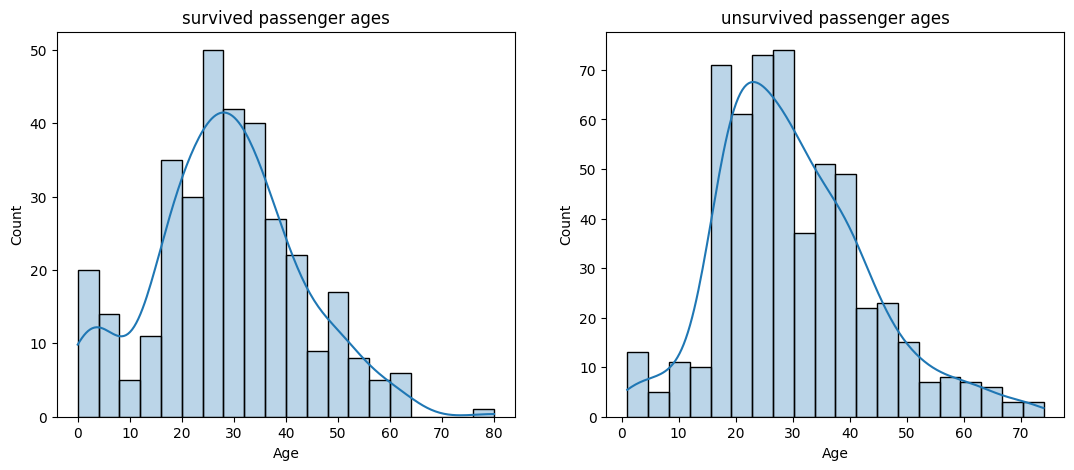

In [85]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', kde=True, bins=20,  alpha=0.3 );

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age', kde=True, bins=20, alpha=0.3 );

In [86]:
Infant_passengers = Dataset[Dataset['Age']<=5]
Infant_passengers['Survived'].value_counts(normalize=True)

Survived
1    0.704545
0    0.295455
Name: proportion, dtype: float64

In [87]:
Old_passengers = Dataset[Dataset['Age']==80]
Old_passengers['Survived'].value_counts()

Survived
1    1
Name: count, dtype: int64

| Observations



Pclass=3 had most passengers(488 passengers), however the most of them didn't survive (116 passengers survived and not-survived about 75.8%).

Most passengers in Pclass=1 survived about 62.9%.

Infant passengers (Age <=5) had high survival rate, about 70.4% of infant passengers survived.

There is only one passengers with 80 years old and he survived.

Large number of 15-25 year olds did not survive.

Female passengers had much better survival rate than males( 74.2% of female passengers survived but just 18.8% of males survived.)

Port S had most passengers(640 passengers) but the most of them didn't survive (424 passengers survived and not-survived about 67%).

The majority of port C passengers survived (90 passengers survived out of 162 about 55.5%)

2- Bivariative Analysis



I | Sex and Age analysis

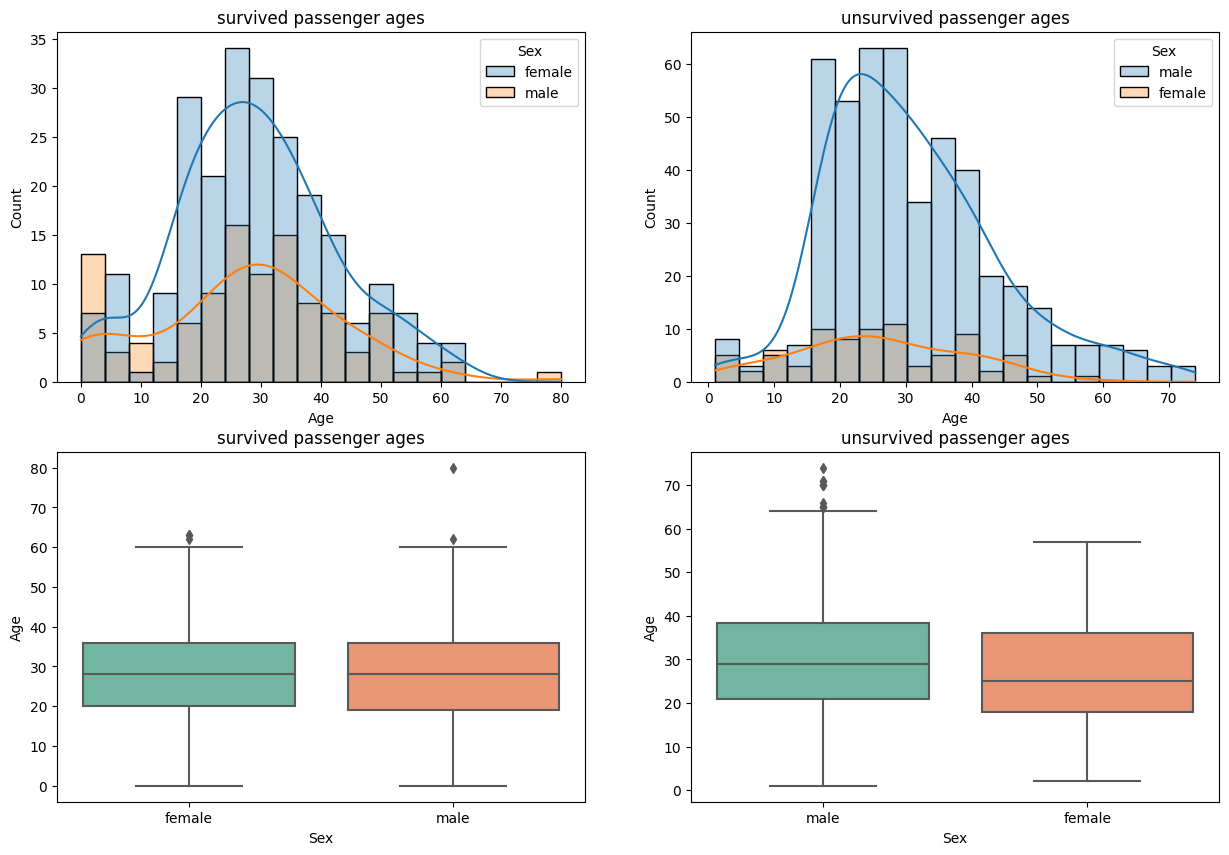

In [88]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', hue='Sex', kde=True, bins=20,  alpha=0.3 );

plt.subplot(2,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age',hue='Sex', kde=True, bins=20, alpha=0.3 );

plt.subplot(2,2,3)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Sex'], y=Dataset["Age"],palette="Set2");

plt.subplot(2,2,4)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Sex'], y=Dataset["Age"],palette="Set2");

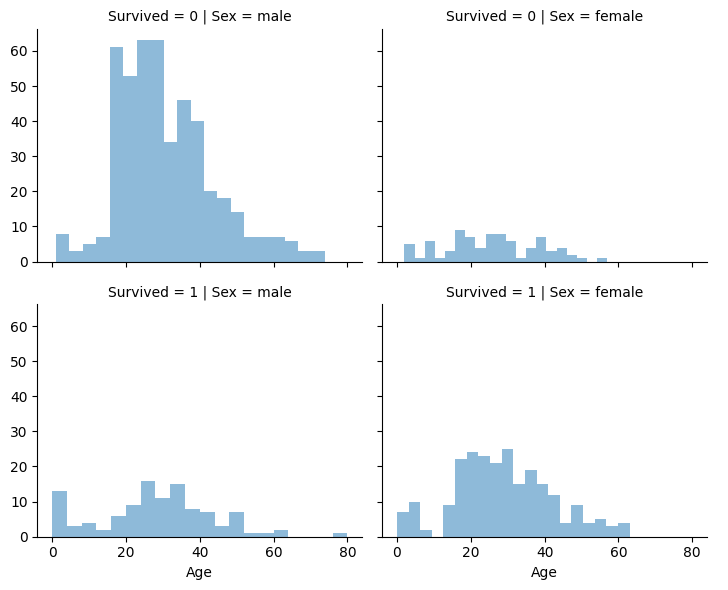

In [89]:
grid = sns.FacetGrid(Dataset, col='Sex', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [90]:
print('surviving male passengers \n')

print(survived_passengers[survived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('surviving female passengers \n')

print(survived_passengers[survived_passengers['Sex']=='female'][['Age']].describe().T)

surviving male passengers 

     count       mean        std  min   25%   50%   75%   max
Age  109.0  27.587156  15.697494  0.0  19.0  28.0  36.0  80.0
--------------------------------
surviving female passengers 

     count       mean       std  min   25%   50%   75%   max
Age  233.0  28.901288  13.36857  0.0  20.0  28.0  36.0  63.0


In [91]:
print('non-surviving male passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('non-surviving female passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='female'][['Age']].describe().T)

non-surviving male passengers 

     count       mean       std  min   25%   50%    75%   max
Age  468.0  30.848291  13.04811  1.0  21.0  29.0  38.25  74.0
--------------------------------
non-surviving female passengers 

     count       mean        std  min   25%   50%   75%   max
Age   81.0  25.679012  12.759141  2.0  18.0  25.0  36.0  57.0


II | Pclass and Age analysis

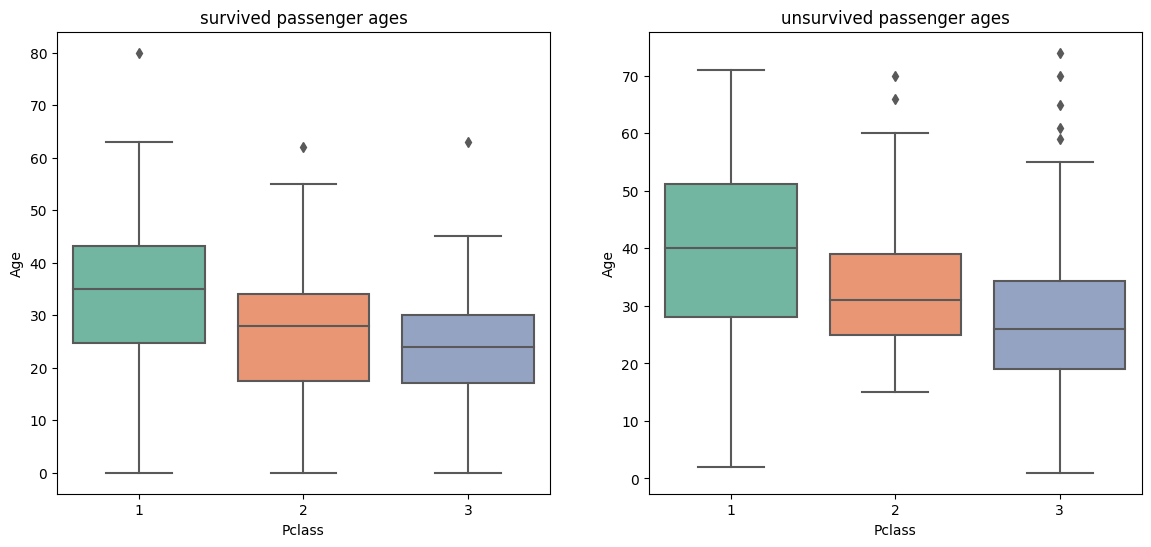

In [92]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Pclass'], y=Dataset["Age"],palette="Set2");

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Pclass'], y=Dataset["Age"],palette="Set2");

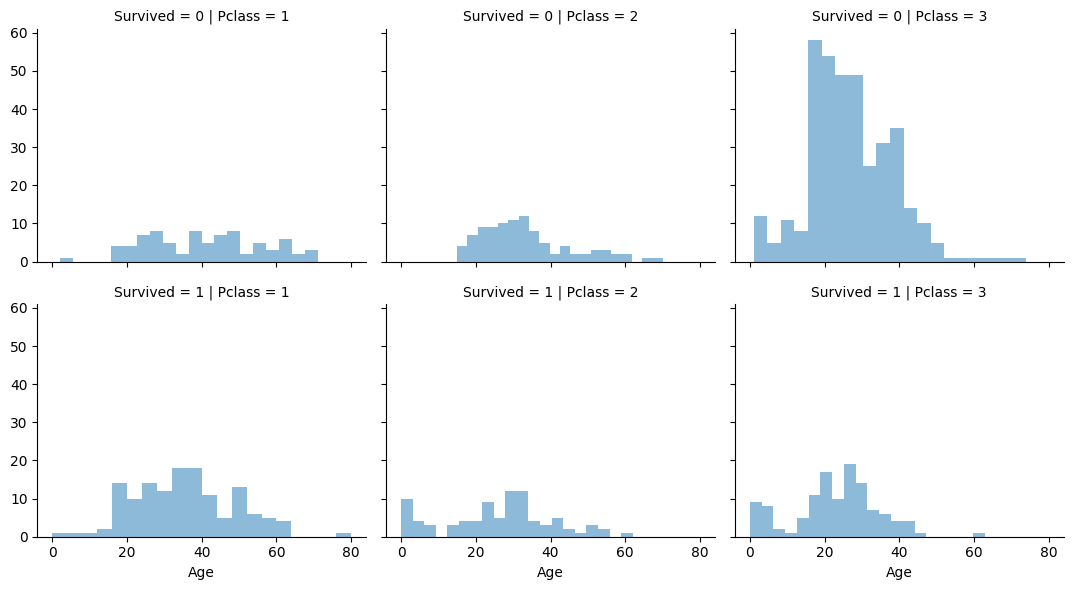

In [93]:
grid = sns.FacetGrid(Dataset, col='Pclass', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

III | Sex and Pclass analysis

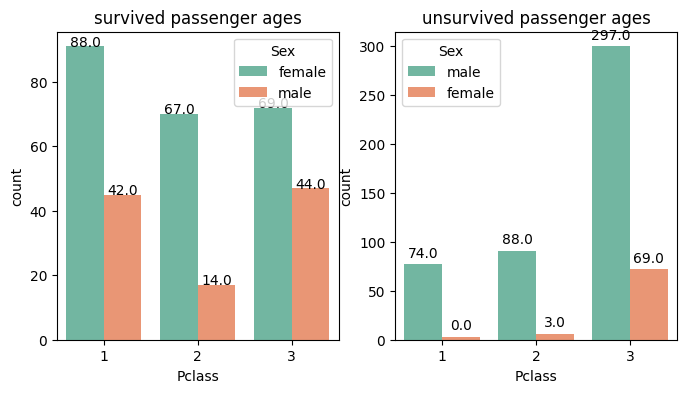

In [94]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

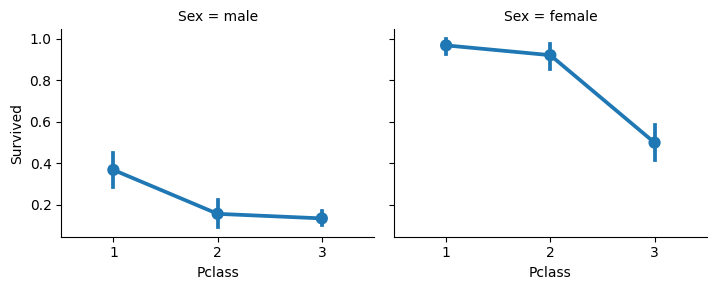

In [95]:
grid = sns.FacetGrid(Dataset, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'Pclass', 'Survived')
grid.add_legend();

IV | Sex and IsAlone analysis

In [96]:
#survived passengers
survived_passengers= Dataset[Dataset['Survived']==1]

#non-survived passengers
unsurvived_passengers= Dataset[Dataset['Survived']==0]

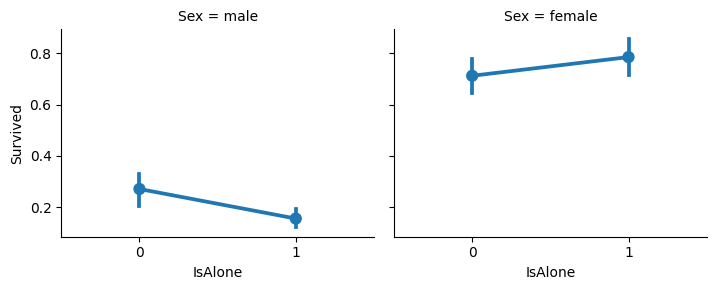

In [97]:
grid = sns.FacetGrid(Dataset, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'IsAlone', 'Survived')
grid.add_legend();

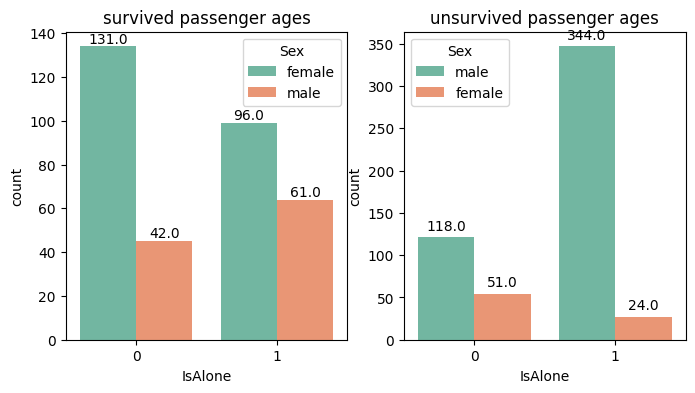

In [98]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

| Observations



Average age for non-surviving male passengers is 31, And on the other hand non-surviving female passengers is 26 .

Most male passengers aged 20-35 did not survive.

Infant passengers in Pclass=2 and Pclass=3 mostly survived.

Half of the female passengers inside Pclass=3 survive (50% of passengers counted 69).

All female passengers inside Pclass=1 survived and about 95 of female passengers inside Pclass=2 survived.

About 87% of male passengers inside Pclass=3 and Pclass=2 non-survived but about 36.3% of them survived in Pclass=1.

Most of alone men non-survived (About 85%), on other hand about 72% of alone women survived.

Almost half of the passengers who are not alone survived(About 50.5%).



3- Multivariative Analysis




I | Sex, Pclass and Embarked analysis

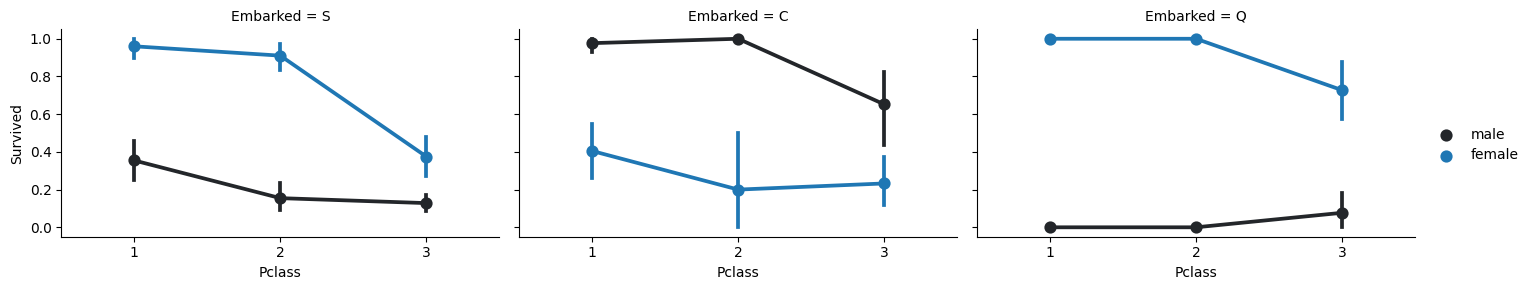

In [99]:
grid = sns.FacetGrid(Dataset, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

II | Sex, Fare and Embarked analysis

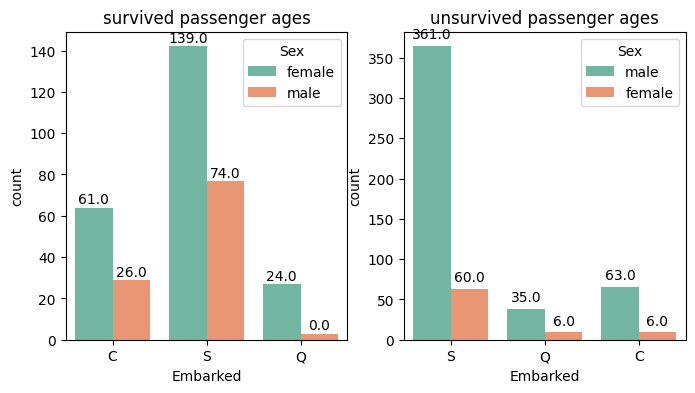

In [100]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

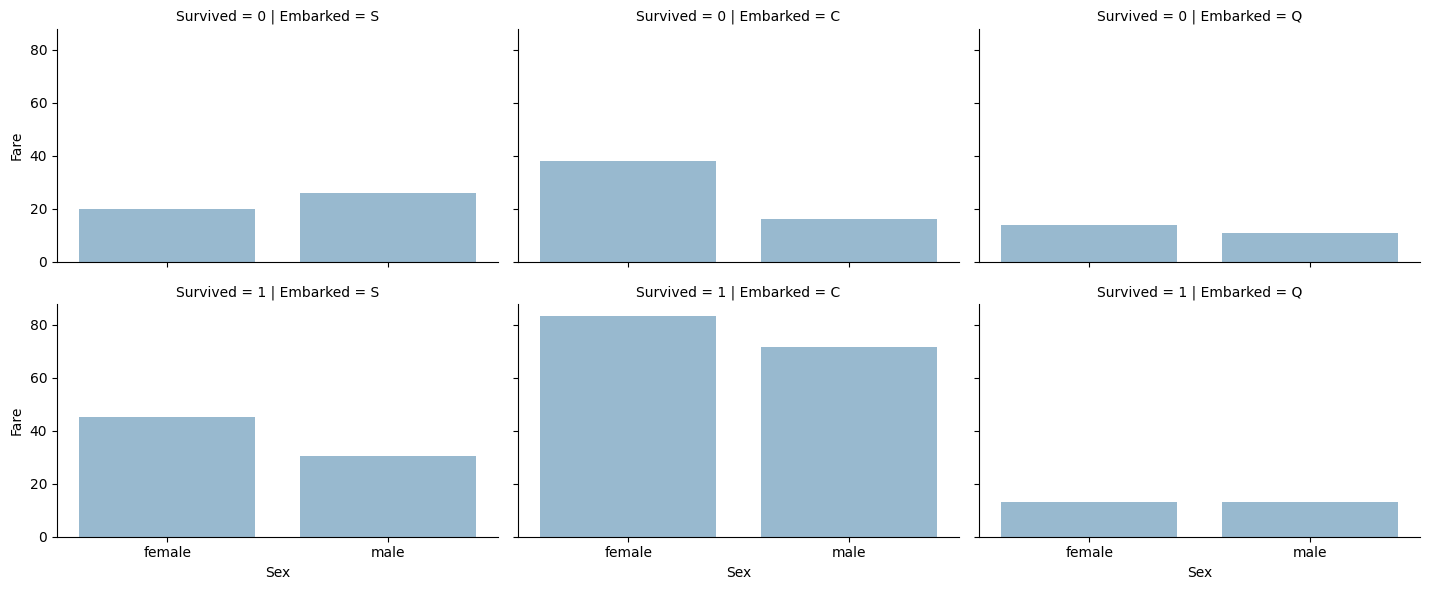

In [101]:
grid = sns.FacetGrid(Dataset, col='Embarked', row='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

| Observations

--> Women on port Q and S have a higher chance of survival. But it's inverse at port C.

--> Men have a high survival probability on port C, but a low probability on port Q or S.

--> Most female passengers inside Pclass=3 on port C and S non-survived but most of them survived on port Q.

--> Higher fare paying passengers had better survival.

--> Passengers on port Q paid less fare.

--> Nearly no male survived on port Q.

--> Females on port Q (about 37% of all port Q passengers) Survived, however they paid small fare.